In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Loading the Data

In [2]:
data  = pd.read_excel('master x.xlsx', sheet_name="MASTER_FOR_ML_Update")
data.head()

,Unnamed: 0,Horse ID,Price_Back_1,Size_Back_1,Price_Back_2,Size_Back_2,Price_Back_3,Size_Back_3,Price_Lay_1,Size_Lay_1,Price_Lay_2,Size_Lay_2,Price_Lay_3,Size_Lay_3,Total Volume,Back %,Lay %,Match ID,Horse Volume,Horse Volume %
0,0,8887142,9.6,3.00,9.0,6.01,8.6,5.00,10.5,11.32,11.0,78.09,34.0,18.74,2509.57,109.068515,86.701089,1.216974,296.79,11.826329
1,1,54944458,21.0,1.89,20.0,1.67,19.5,1.08,42.0,1.23,230.0,3.94,240.0,9.00,2509.57,109.068515,86.701089,1.216974,44.31,1.765641
2,2,15233,18.0,3.21,17.5,6.35,14.5,4.93,26.0,1.35,38.0,10.93,200.0,3.44,2509.57,109.068515,86.701089,1.216974,42.18,1.680766
3,3,18670569,9.6,1.15,9.4,5.01,8.0,3.94,11.0,2.00,11.5,2.92,12.0,35.10,2509.57,109.068515,86.701089,1.216974,98.61,3.929358
4,4,55345341,5.7,4.42,5.2,5.81,5.0,1.36,6.6,3.04,6.8,2.14,7.0,152.03,2509.57,109.068515,86.701089,1.216974,313.96,12.510510


In [3]:
#lets Select the columns which we will be use for our purpose and drop the remaining columns
selected_columns = ['Horse ID','Price_Back_1','Price_Lay_1', 'Horse Volume %']
selected_data = data[selected_columns]
# Print the resulting DataFrame
selected_data.head()

,Horse ID,Price_Back_1,Price_Lay_1,Horse Volume %
0,8887142,9.6,10.5,11.826329
1,54944458,21.0,42.0,1.765641
2,15233,18.0,26.0,1.680766
3,18670569,9.6,11.0,3.929358
4,55345341,5.7,6.6,12.510510


In [4]:
## Now lets see the number of row and column in our master x.xlsx file data
row, cols = selected_data.shape
row,cols

(638, 4)

In [5]:
#Now lets see for the dublicate values in Horse ID because Horse ID, Price_Back_1,Price_Lay_1 and Horse Volume % should be unique to differntiate one horse from other

# Pre-Processing the data

In [6]:
## First for checking null values so here are no values which are null (NaN)
selected_data.isnull().sum()

Horse ID          0
Price_Back_1      0
Price_Lay_1       0
Horse Volume %    0
dtype: int64

In [7]:
# Lets find out the dublicate values
dublicate = selected_data[selected_data.duplicated(['Horse ID', 'Price_Back_1','Price_Lay_1','Horse Volume %'], keep='first')]
dublicate

,Horse ID,Price_Back_1,Price_Lay_1,Horse Volume %
33,8887142,10.0,10.5,11.661369
34,54944458,21.0,48.0,1.741013
35,15233,19.0,26.0,1.733941
36,18670569,9.6,11.0,3.874550
37,55345341,6.4,6.6,12.383156
...,...,...,...,...
526,56330232,12.0,13.5,3.206477
605,8887142,10.0,11.0,13.598235
608,18670569,9.6,10.0,7.256707
610,56584908,7.6,8.0,12.584246


In [8]:
#Now lets check for the specific value in Horse ID as a sample
dublicate[dublicate['Horse ID']==8887142]

,Horse ID,Price_Back_1,Price_Lay_1,Horse Volume %
33,8887142,10.0,10.5,11.661369
44,8887142,10.0,10.5,11.661369
55,8887142,10.0,10.5,11.661369
66,8887142,10.0,10.5,11.661369
88,8887142,10.0,10.5,11.139553
132,8887142,9.2,10.0,11.264958
143,8887142,9.2,10.0,11.264958
176,8887142,8.8,9.8,11.590380
187,8887142,8.8,9.8,11.590380
220,8887142,9.0,9.6,11.451216


In [9]:
dublicate.shape

(168, 4)

In [10]:
##Ohh here are 168 rows dublicates out of 638 which is large data is dublicated and we need to solve this issue first.
## SO dublicates are large in numbers so we will not drop these values but will use aggregate techniques to clean the data
## here we are using the linear interpolation techniques to solve this dublicate issue

In [11]:
# Create a copy of the selected data
selected_data1 = selected_data[['Horse ID', 'Price_Back_1', 'Price_Lay_1', 'Horse Volume %']].copy()

# Sort the data by 'Horse ID'
selected_data1.sort_values(by='Horse ID', inplace=True)

# Find duplicate 'Horse ID' entries
duplicates = selected_data1[selected_data1.duplicated('Horse ID', keep='first')]

# Calculate the step for linear interpolation
step = 1 / (len(duplicates) + 1)

# Interpolate the 'Horse ID' values for duplicates
for i, duplicate_row in enumerate(duplicates.iterrows()):
    index, row = duplicate_row
    selected_data1.at[index, 'Horse ID'] += step * (i + 1)

# Sort the data back to its original order
selected_data1.sort_index(inplace=True)

# Set the display format for float values without commas
pd.options.display.float_format = '{:.0f}'.format

# Display the modified DataFrame
selected_data1


,Horse ID,Price_Back_1,Price_Lay_1,Horse Volume %
0,8887142,10,10,12
1,54944459,21,42,2
2,15233,18,26,2
3,18670569,10,11,4
4,55345342,6,7,13
...,...,...,...,...
633,55432877,16,18,1
634,56777089,60,80,0
635,736812,12,12,8
636,56330233,14,14,3


In [12]:
##Now lets check that is there any dublicate in these all columns

clear_dublicate = selected_data1[selected_data1.duplicated(['Horse ID', 'Price_Back_1','Price_Lay_1','Horse Volume %'], keep='first')]
clear_dublicate

,Horse ID,Price_Back_1,Price_Lay_1,Horse Volume %


In [13]:
#Now lets check for the specific value in Horse ID
selected_data1[selected_data1['Horse ID']==54944458]

,Horse ID,Price_Back_1,Price_Lay_1,Horse Volume %
353,54944458,27,40,1


In [14]:
# Now its time to put Horse ID as our index of the data frame
selected_data1.set_index('Horse ID', inplace=True)
new_df = selected_data1.copy()

In [15]:
new_df.head()

,Price_Back_1,Price_Lay_1,Horse Volume %
Horse ID,,,
8887142,10,10,12
54944459,21,42,2
15233,18,26,2
18670569,10,11,4
55345342,6,7,13


In [16]:
## Now its time to Visualize the data of each column with corresponding to the Horse ID

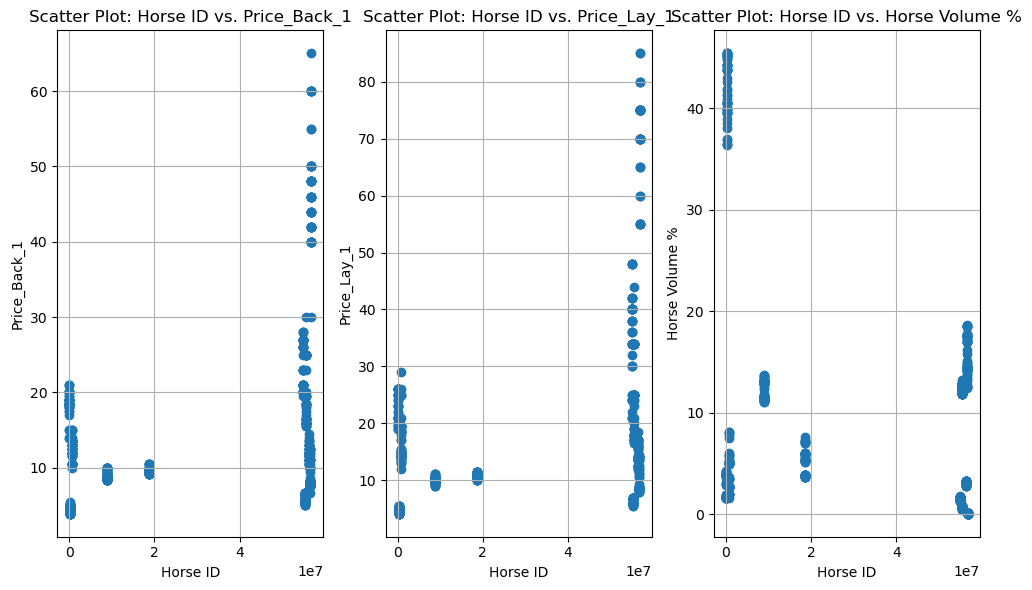

In [17]:
import matplotlib.pyplot as plt

# Create a figure with a specific size
plt.figure(figsize=(10, 6))  # Adjust width and height as needed

# Scatter plot of 'Horse ID' vs. 'Price_Back_1'
plt.subplot(131)  # 1 row, 3 columns, subplot 1
plt.scatter(new_df.index, new_df['Price_Back_1'])
plt.xlabel('Horse ID')
plt.ylabel('Price_Back_1')
plt.title('Scatter Plot: Horse ID vs. Price_Back_1')
plt.grid(True)

# Scatter plot of 'Horse ID' vs. 'Price_Lay_1'
plt.subplot(132)  # 1 row, 3 columns, subplot 2
plt.scatter(new_df.index, new_df['Price_Lay_1'])
plt.xlabel('Horse ID')
plt.ylabel('Price_Lay_1')
plt.title('Scatter Plot: Horse ID vs. Price_Lay_1')
plt.grid(True)

# Scatter plot of 'Horse ID' vs. 'Horse Volume %'
plt.subplot(133)  # 1 row, 3 columns, subplot 3
plt.scatter(new_df.index, new_df['Horse Volume %'])
plt.xlabel('Horse ID')
plt.ylabel('Horse Volume %')
plt.title('Scatter Plot: Horse ID vs. Horse Volume %')
plt.grid(True)

# Adjust layout to prevent overlapping titles
plt.tight_layout()

# Show all scatter plots
plt.show()


In [18]:
from sklearn.preprocessing import MinMaxScaler

# Reshape X to a 2D array with one feature
X = new_df[["Horse Volume %"]]  # Use double brackets to select it as a DataFrame
y = new_df[["Price_Back_1", "Price_Lay_1"]]

# Initialize the MinMaxScaler
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

# Fit and transform the input features
open_scaled = scaler_X.fit_transform(X)

# Fit and transform the output features
volu_scaled = scaler_y.fit_transform(y)

# You can access the scaled values with open_scaled and volu_scaled now


In [19]:
volu_scaled

array([[0.09328969, 0.07911001],
       [0.27986907, 0.4684796 ],
       [0.23076923, 0.27070457],
       ...,
       [0.12438625, 0.09765142],
       [0.15711948, 0.1223733 ],
       [0.01800327, 0.01359703]])

In [20]:
# Create a DataFrame from the scaled input features
scaled_df = pd.DataFrame(open_scaled, columns=["Horse Volume %_Scaled"], index=new_df.index)
volu_scaled_df = pd.DataFrame(volu_scaled, columns=['Price_Back_1_Scaled', 'Price_Lay_1_Scaled'], index=new_df.index)

# Concatenate the scaled DataFrames with the original DataFrame
result_df = pd.concat([new_df, volu_scaled_df,scaled_df], axis=1)
result_df.head() 

,Price_Back_1,Price_Lay_1,Horse Volume %,Price_Back_1_Scaled,Price_Lay_1_Scaled,Horse Volume %_Scaled
Horse ID,,,,,,
8887142,10,10,12,0,0,0
54944459,21,42,2,0,0,0
15233,18,26,2,0,0,0
18670569,10,11,4,0,0,0
55345342,6,7,13,0,0,0


In [21]:
###### Now i have scalled my data now its time to drop the coulmn other than _scaled because we don't need that columns any more #########

In [22]:
filtered_df = result_df.drop(columns=["Price_Back_1", "Price_Lay_1", "Horse Volume %"])
filtered_df.tail()

,Price_Back_1_Scaled,Price_Lay_1_Scaled,Horse Volume %_Scaled
Horse ID,,,
55432877,0,0,0
56777089,1,1,0
736812,0,0,0
56330233,0,0,0
240980,0,0,1


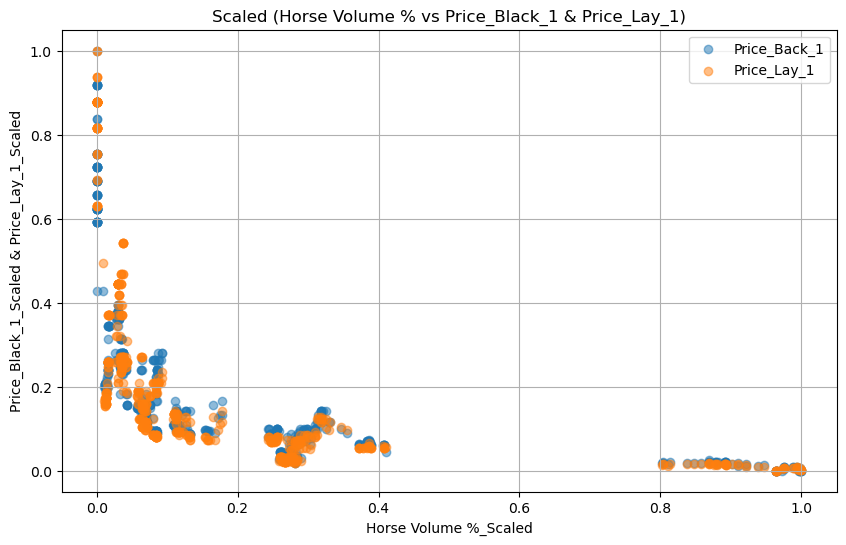

In [23]:
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(10, 6))

# Scatter plot for Price_Back_1 vs. Horse Volume %
plt.scatter(filtered_df['Horse Volume %_Scaled'], filtered_df['Price_Back_1_Scaled'], label='Price_Back_1', alpha=0.5)

# Scatter plot for Price_Lay_1 vs. Horse Volume %
plt.scatter(filtered_df['Horse Volume %_Scaled'], filtered_df['Price_Lay_1_Scaled'], label='Price_Lay_1', alpha=0.5)

# Set labels and title
plt.xlabel('Horse Volume %_Scaled')
plt.ylabel('Price_Black_1_Scaled & Price_Lay_1_Scaled')
plt.title('Scaled (Horse Volume % vs Price_Black_1 & Price_Lay_1)')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()


In [24]:
#We can see clearly that there are an outliers in the data in Horse Volume % vs Price_Back_1 at above 30 on y-axis
# And We can see clearly that there are an outliers in the data in Horse Volume % vs Price_Lay_1 at above 50 on y-axis

In [25]:
### Now first we have to remove that outliers like simply drop it######
No_outliers = filtered_df[(filtered_df['Price_Back_1_Scaled'] <= 0.3) & (filtered_df['Price_Lay_1_Scaled'] < 0.3)]
No_outliers 

,Price_Back_1_Scaled,Price_Lay_1_Scaled,Horse Volume %_Scaled
Horse ID,,,
8887142,0,0,0
15233,0,0,0
18670569,0,0,0
55345342,0,0,0
56584909,0,0,0
...,...,...,...
56584909,0,0,0
55432877,0,0,0
736812,0,0,0


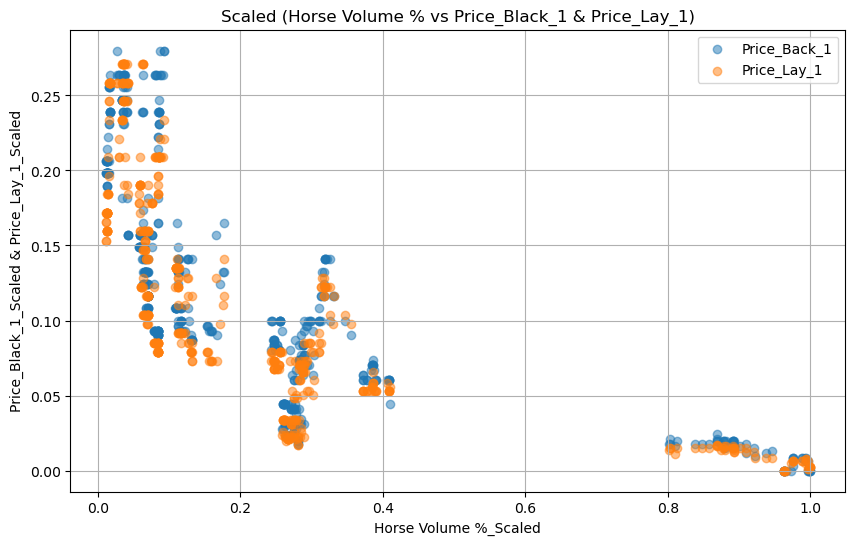

In [26]:
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(10, 6))

# Scatter plot for Price_Back_1 vs. Horse Volume %
plt.scatter(No_outliers['Horse Volume %_Scaled'], No_outliers['Price_Back_1_Scaled'], label='Price_Back_1', alpha=0.5)

# Scatter plot for Price_Lay_1 vs. Horse Volume %
plt.scatter(No_outliers['Horse Volume %_Scaled'], No_outliers['Price_Lay_1_Scaled'], label='Price_Lay_1', alpha=0.5)

# Set labels and title
plt.xlabel('Horse Volume %_Scaled')
plt.ylabel('Price_Black_1_Scaled & Price_Lay_1_Scaled')
plt.title('Scaled (Horse Volume % vs Price_Black_1 & Price_Lay_1)')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()


In [27]:
## This is our final model with claer and clean data so at this point the Preprocessing method is finished
No_outliers.shape

(522, 3)

# Model Selection for our Data

In [28]:
## AS the Problem is Regression supervised Problem so we will use K-nearest-neighbor algorithm with cluster concept. 

In [29]:
No_outliers.head()

,Price_Back_1_Scaled,Price_Lay_1_Scaled,Horse Volume %_Scaled
Horse ID,,,
8887142,0,0,0
15233,0,0,0
18670569,0,0,0
55345342,0,0,0
56584909,0,0,0


In [30]:
### Now the elbow graph tell us that the number of cluster to be select for our model is Cluster = 3
#### Now it regression problem so we are now going to use cluster techniques like k-means Algorithm #########

In [31]:
#Now converting back our data from scalling to unscalling

In [32]:
scaler = MinMaxScaler()
scaler.fit(No_outliers)
original_input_data = pd.DataFrame(scaler.inverse_transform(No_outliers))


In [33]:
Constant_values = original_input_data*100

In [34]:
type(Constant_values)

pandas.core.frame.DataFrame

In [35]:
Constant_values.rename(columns={0: 'Price_Back_1_Scaled', 1: 'Price_Lay_1_Scaled', 2: 'Horse Volume %_Scaled'}, inplace=True)

In [36]:
Constant_values

,Price_Back_1_Scaled,Price_Lay_1_Scaled,Horse Volume %_Scaled
0,3,2,27
1,6,7,5
2,3,2,9
3,1,1,28
4,1,2,42
...,...,...,...
517,2,1,29
518,6,4,2
519,3,3,18
520,4,3,7


# Split the Data for training and testing


In [37]:
## Selecting X and y variable
from sklearn.model_selection import train_test_split
X = Constant_values[['Horse Volume %_Scaled']]
y = Constant_values[["Price_Back_1_Scaled", "Price_Lay_1_Scaled"]]

In [38]:
## Here is the model and we select the test size of data upto 20% and training data upto 80% of our total data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15)

# 1) Decision Tree with K-fold and Gridsearchcv


In [39]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
reg = DecisionTreeRegressor(random_state=0)
cross_val_score(reg, X, y, cv=10)

array([0.81429892, 0.69945875, 0.92750093, 0.96487569, 0.75673327,
       0.82663796, 0.87191306, 0.85178155, 0.5614492 , 0.71828489])

In [40]:
reg.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [41]:
reg.score(X_test, y_test)

0.9434971694995844

In [42]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

param_grid = {
    
    'max_depth': [10, 20, 30, 40,70,90,100],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10,20,30,70,80],  # Minimum samples required to split an internal node
    'min_samples_leaf': [1, 2, 4,7,9,10],  # Minimum samples required to be a leaf node
    'max_features': ['sqrt', 'log2'],  # Number of features to consider for the best split
    'random_state': [0,10,20,30,40,50,60],  # Seed for random number generator
}

# Create the DecisionTreeRegressor object for regression
reg = DecisionTreeRegressor()

# Create the GridSearchCV object
Decision_Grid = GridSearchCV(reg, param_grid, cv=10, return_train_score=False)

# Fit the model with your training data
Decision_Grid.fit(X_train, y_train)

# Access the results using clf.cv_results_
Decision_Grid.cv_results_
data = pd.DataFrame(Decision_Grid.cv_results_)
data


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,param_random_state,params,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0,0,0,0,10,sqrt,1,2,0,"{'max_depth': 10, 'max_features': 'sqrt', 'min...",...,1,1,1,1,1,1,1,1,0,2129
1,0,0,0,0,10,sqrt,1,2,10,"{'max_depth': 10, 'max_features': 'sqrt', 'min...",...,1,1,1,1,1,1,1,1,0,2129
2,0,0,0,0,10,sqrt,1,2,20,"{'max_depth': 10, 'max_features': 'sqrt', 'min...",...,1,1,1,1,1,1,1,1,0,2129
3,0,0,0,0,10,sqrt,1,2,30,"{'max_depth': 10, 'max_features': 'sqrt', 'min...",...,1,1,1,1,1,1,1,1,0,2129
4,0,0,0,0,10,sqrt,1,2,40,"{'max_depth': 10, 'max_features': 'sqrt', 'min...",...,1,1,1,1,1,1,1,1,0,2129
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4111,0,0,0,0,100,log2,10,80,20,"{'max_depth': 100, 'max_features': 'log2', 'mi...",...,1,1,1,1,1,1,1,1,0,3529
4112,0,0,0,0,100,log2,10,80,30,"{'max_depth': 100, 'max_features': 'log2', 'mi...",...,1,1,1,1,1,1,1,1,0,3529
4113,0,0,0,0,100,log2,10,80,40,"{'max_depth': 100, 'max_features': 'log2', 'mi...",...,1,1,1,1,1,1,1,1,0,3529
4114,0,0,0,0,100,log2,10,80,50,"{'max_depth': 100, 'max_features': 'log2', 'mi...",...,1,1,1,1,1,1,1,1,0,3529


In [43]:
data[['param_max_depth','param_min_samples_split', 'param_min_samples_leaf','param_max_features','param_random_state','mean_test_score','rank_test_score']]

,param_max_depth,param_min_samples_split,param_min_samples_leaf,param_max_features,param_random_state,mean_test_score,rank_test_score
0,10,2,1,sqrt,0,1,2129
1,10,2,1,sqrt,10,1,2129
2,10,2,1,sqrt,20,1,2129
3,10,2,1,sqrt,30,1,2129
4,10,2,1,sqrt,40,1,2129
...,...,...,...,...,...,...,...
4111,100,80,10,log2,20,1,3529
4112,100,80,10,log2,30,1,3529
4113,100,80,10,log2,40,1,3529
4114,100,80,10,log2,50,1,3529


In [44]:
Decision_Grid.best_score_

0.8702680574024185

In [45]:
Decision_Grid.best_params_

{'max_depth': 20,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'random_state': 0}

# 2) KNeighborsRegressor with Kfold and Gridsearchcv

In [46]:
from sklearn.neighbors import KNeighborsRegressor
reg3 = KNeighborsRegressor(n_neighbors=10)
cross_val_score(reg3, X, y, cv=10)

array([0.81064173, 0.86627038, 0.97497576, 0.88901834, 0.80595315,
       0.84765309, 0.87115844, 0.71366524, 0.55489661, 0.83903035])

In [47]:
reg3.fit(X_train, y_train)
reg3.score(X_test, y_test)

0.8984920774546454

In [48]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'weights': ['distance','uniform'],  # Weight neighbors by distance
    'algorithm': ['auto','ball_tree','kd_tree'],  # Algorithm for nearest neighbor search
    'leaf_size': [10, 20, 30, 40, 50, 60, 70],  # Relevant for 'ball_tree' or 'kd_tree' algorithms
    'p': [2,4,8,10,12,14,16,20],  # Use Euclidean distance (L2 norm)
    'n_jobs': [-1],  # Use all available CPU cores for parallelism
}

# Create the GridSearchCV object
clf = GridSearchCV(reg3, param_grid, cv=10, return_train_score=False)

# Fit the model with your training data
clf.fit(X_train, y_train)

# Access the results using clf.cv_results_
clf.cv_results_
df = pd.DataFrame(clf.cv_results_)
df


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_algorithm,param_leaf_size,param_n_jobs,param_p,param_weights,params,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0,0,0,1,auto,10,-1,2,distance,"{'algorithm': 'auto', 'leaf_size': 10, 'n_jobs...",...,1,1,1,1,1,1,1,1,0,105
1,0,0,0,0,auto,10,-1,2,uniform,"{'algorithm': 'auto', 'leaf_size': 10, 'n_jobs...",...,1,1,1,1,1,1,1,1,0,321
2,0,0,0,0,auto,10,-1,4,distance,"{'algorithm': 'auto', 'leaf_size': 10, 'n_jobs...",...,1,1,1,1,1,1,1,1,0,105
3,0,0,0,0,auto,10,-1,4,uniform,"{'algorithm': 'auto', 'leaf_size': 10, 'n_jobs...",...,1,1,1,1,1,1,1,1,0,321
4,0,0,0,0,auto,10,-1,8,distance,"{'algorithm': 'auto', 'leaf_size': 10, 'n_jobs...",...,1,1,1,1,1,1,1,1,0,105
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331,0,0,0,0,kd_tree,70,-1,14,uniform,"{'algorithm': 'kd_tree', 'leaf_size': 70, 'n_j...",...,1,1,1,1,1,1,1,1,0,169
332,0,0,0,0,kd_tree,70,-1,16,distance,"{'algorithm': 'kd_tree', 'leaf_size': 70, 'n_j...",...,1,1,1,1,1,1,1,1,0,1
333,0,0,0,0,kd_tree,70,-1,16,uniform,"{'algorithm': 'kd_tree', 'leaf_size': 70, 'n_j...",...,1,1,1,1,1,1,1,1,0,169
334,0,0,0,0,kd_tree,70,-1,20,distance,"{'algorithm': 'kd_tree', 'leaf_size': 70, 'n_j...",...,1,1,1,1,1,1,1,1,0,37


In [49]:
df[['param_weights','param_algorithm','param_leaf_size','param_p', 'param_n_jobs','mean_test_score','rank_test_score']]

,param_weights,param_algorithm,param_leaf_size,param_p,param_n_jobs,mean_test_score,rank_test_score
0,distance,auto,10,2,-1,1,105
1,uniform,auto,10,2,-1,1,321
2,distance,auto,10,4,-1,1,105
3,uniform,auto,10,4,-1,1,321
4,distance,auto,10,8,-1,1,105
...,...,...,...,...,...,...,...
331,uniform,kd_tree,70,14,-1,1,169
332,distance,kd_tree,70,16,-1,1,1
333,uniform,kd_tree,70,16,-1,1,169
334,distance,kd_tree,70,20,-1,1,37


In [50]:
#best parameter selection using grid-cv
clf.best_params_

{'algorithm': 'auto',
 'leaf_size': 50,
 'n_jobs': -1,
 'p': 2,
 'weights': 'distance'}

In [51]:
#best score using grid-cv
clf.best_score_

0.8977433917103672

# 3) RandomFores - MultiOutputRegressor Model with K-fold and GridSearchCv

In [52]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.multioutput import MultiOutputRegressor

# Create a Random Forest Regressor
rf = RandomForestRegressor(n_estimators = 500,  criterion='friedman_mse', max_depth=1000, min_samples_split=7,  random_state=1100)

# Create a MultiOutputRegressor
multi_output_rf = MultiOutputRegressor(rf)

# Fit the model and make predictions
multi_output_rf.fit(X_train, y_train)
cross_val_score(multi_output_rf, X, y, cv=20)


array([0.8457048 , 0.89060272, 0.87421881, 0.92569434, 0.94582518,
       0.99242326, 0.88623097, 0.88345268, 0.92344082, 0.66168346,
       0.80826433, 0.96250439, 0.9884438 , 0.8289282 , 0.9046485 ,
       0.89836917, 0.68258487, 0.62528229, 0.90092651, 0.9487645 ])

In [53]:
multi_output_rf.score(X_test, y_test)

0.9517977459096936

In [54]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

multi_output_rf.predict([[28]])

array([[1.12344957, 0.8701869 ]])

In [56]:
import copy

# Assuming multi_output_rf is your MultiOutputRegressor object
multi_output_rf1 = copy.deepcopy(multi_output_rf)


In [84]:
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

param_grid = {
    'estimator__n_estimators': [500,200,300,400],
    'estimator__max_depth': [1000,750, 500, 250],
    'estimator__min_samples_split': [7,9,8,4,3],
    'estimator__random_state': [1100,1000,100,50],
}

# Create the RandomForestRegressor object
rf_regressor = RandomForestRegressor()

# Create the MultiOutputRegressor object with the base estimator
multi_output_rf = MultiOutputRegressor(estimator=rf_regressor)

# Create the GridSearchCV object with n_jobs set to -1 (uses all available cores)
RandomForest_Grid = GridSearchCV(multi_output_rf, param_grid, cv=20, return_train_score=False, n_jobs=-1)

# Fit the model with your training data
RandomForest_Grid.fit(X_train, y_train)

# Access the results using clf.cv_results_
RandomForest_Grid.cv_results_
data2 = pd.DataFrame(RandomForest_Grid.cv_results_)
data2


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_estimator__max_depth,param_estimator__min_samples_split,param_estimator__n_estimators,param_estimator__random_state,params,split0_test_score,...,split13_test_score,split14_test_score,split15_test_score,split16_test_score,split17_test_score,split18_test_score,split19_test_score,mean_test_score,std_test_score,rank_test_score
0,3,0,0,0,1000,7,500,1100,"{'estimator__max_depth': 1000, 'estimator__min...",1,...,1,1,1,1,1,1,1,1,0,37
1,3,0,0,0,1000,7,500,1000,"{'estimator__max_depth': 1000, 'estimator__min...",1,...,1,1,1,1,1,1,1,1,0,41
2,3,0,0,0,1000,7,500,100,"{'estimator__max_depth': 1000, 'estimator__min...",1,...,1,1,1,1,1,1,1,1,0,153
3,3,0,0,0,1000,7,500,50,"{'estimator__max_depth': 1000, 'estimator__min...",1,...,1,1,1,1,1,1,1,1,0,49
4,1,0,0,0,1000,7,200,1100,"{'estimator__max_depth': 1000, 'estimator__min...",1,...,1,1,1,1,1,1,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315,2,0,0,0,250,3,300,50,"{'estimator__max_depth': 250, 'estimator__min_...",1,...,1,1,1,1,1,1,1,1,0,161
316,3,0,0,0,250,3,400,1100,"{'estimator__max_depth': 250, 'estimator__min_...",1,...,1,1,1,1,1,1,1,1,0,181
317,3,0,0,0,250,3,400,1000,"{'estimator__max_depth': 250, 'estimator__min_...",1,...,1,1,1,1,1,1,1,1,0,205
318,3,0,0,0,250,3,400,100,"{'estimator__max_depth': 250, 'estimator__min_...",1,...,1,1,1,1,1,1,1,1,0,289


In [85]:
RandomForest_Grid.best_score_

0.8810753994171842

# Evaluation of Model
Decision to select the model

In [86]:
# As we can see that we use three (3) Models here with there K-fold-cross-validation and also with GridSearchCv techniues to 
#obtain maximum accuracye, Models are Decision tree, KneighborRegressor and RandomForestRegresser for multiple output
# The best accuracy we obtain here is 95% on testing and 96% on training on RandomForestRegresser Now to Evaluate the model
# We will use RandomForestRegresser Model because its accuracy is higher than others and also have best fit

In [87]:
#lets see our dataFrame and than predic values to see what happened
Constant_values

,Price_Back_1_Scaled,Price_Lay_1_Scaled,Horse Volume %_Scaled
0,3,2,27
1,6,7,5
2,3,2,9
3,1,1,28
4,1,2,42
...,...,...,...
517,2,1,29
518,6,4,2
519,3,3,18
520,4,3,7


In [67]:
#Now lets predict some of the values, Consider the row 3 which Horse Volume %_Scaled is 28 and now it predict one
# value 1 and other value near to 1 (0.87) so it means our model is good enough with 95% accuracy
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

multi_output_rf1.predict([[28]])

array([[1.12344957, 0.8701869 ]])

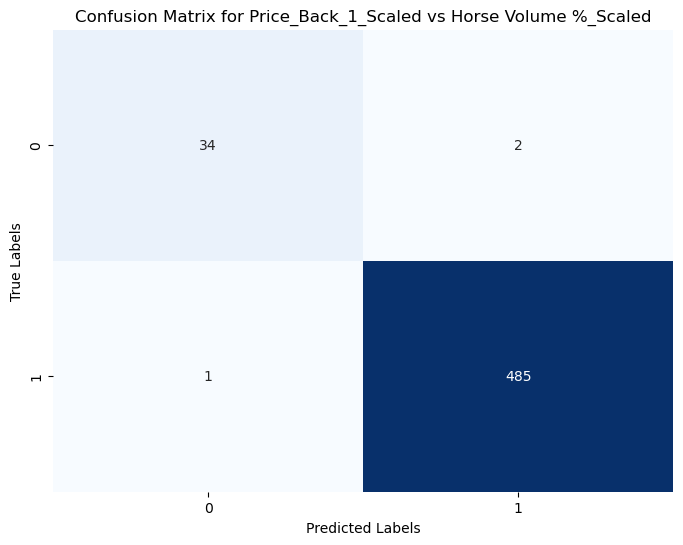

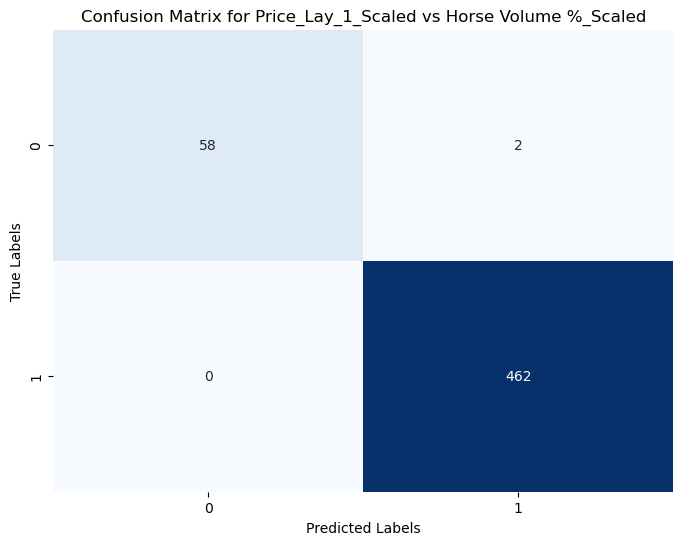

In [68]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Step 1: Make predictions
y_pred = multi_output_rf1.predict(Constant_values[['Horse Volume %_Scaled']])

# Step 2: Define a threshold (e.g., 0.5 for binary classification)
threshold = 0.5

# Step 3: Convert predictions and ground truth labels into binary classes for Price_Back_1_Scaled
y_pred_back_binary = np.where(y_pred[:, 0] > threshold, 1, 0)
y_true_back_binary = np.where(Constant_values['Price_Back_1_Scaled'] > threshold, 1, 0)

# Step 4: Compute the confusion matrix for Price_Back_1_Scaled
conf_matrix_back = confusion_matrix(y_true_back_binary, y_pred_back_binary)

# Step 5: Visualize the confusion matrix using Seaborn for Price_Back_1_Scaled
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_back, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Price_Back_1_Scaled vs Horse Volume %_Scaled')
plt.show()

# Repeat steps 3-5 for Price_Lay_1_Scaled
y_pred_lay_binary = np.where(y_pred[:, 1] > threshold, 1, 0)
y_true_lay_binary = np.where(Constant_values['Price_Lay_1_Scaled'] > threshold, 1, 0)

conf_matrix_lay = confusion_matrix(y_true_lay_binary, y_pred_lay_binary)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_lay, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Price_Lay_1_Scaled vs Horse Volume %_Scaled')
plt.show()


Mean Squared Error (MSE): 0.15643441712404393
Mean Absolute Error (MAE): 0.21601466804224342
R-squared (R2): 0.9642013889734347


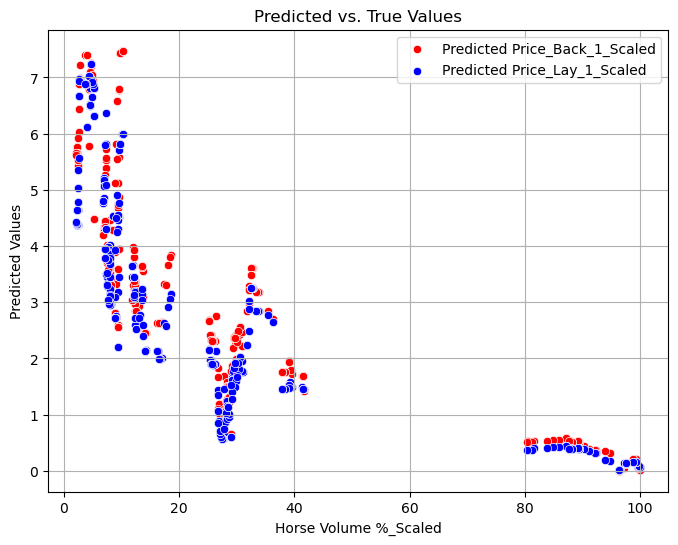

In [69]:
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Make predictions using your multi_output_rf model
y_pred = multi_output_rf1.predict(Constant_values[['Horse Volume %_Scaled']])

# Calculate regression metrics
mse = mean_squared_error(Constant_values[['Price_Back_1_Scaled', 'Price_Lay_1_Scaled']], y_pred)
mae = mean_absolute_error(Constant_values[['Price_Back_1_Scaled', 'Price_Lay_1_Scaled']], y_pred)
r2 = r2_score(Constant_values[['Price_Back_1_Scaled', 'Price_Lay_1_Scaled']], y_pred)

# Print the metrics
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R2): {r2}")

# Create a DataFrame with the predicted values
predicted_values_df = pd.DataFrame({
    'Horse Volume %_Scaled': Constant_values['Horse Volume %_Scaled'],
    'Predicted Price_Back_1_Scaled': y_pred[:, 0],
    'Predicted Price_Lay_1_Scaled': y_pred[:, 1]
})

# Visualize the predictions vs. true values with different colors
plt.figure(figsize=(8, 6))
sns.scatterplot(data=predicted_values_df, x='Horse Volume %_Scaled', y='Predicted Price_Back_1_Scaled', label='Predicted Price_Back_1_Scaled', color='red')
sns.scatterplot(data=predicted_values_df, x='Horse Volume %_Scaled', y='Predicted Price_Lay_1_Scaled', label='Predicted Price_Lay_1_Scaled', color='blue')
plt.xlabel('Horse Volume %_Scaled')
plt.ylabel('Predicted Values')
plt.title('Predicted vs. True Values')
plt.legend()
plt.grid(True)
plt.show()


In [70]:
#Now here are the results of our data Mean Squared Error (MSE): 0.15643441712404393, 
#Mean Absolute Error (MAE): 0.21601466804224342
#R-squared (R2): 0.9642013889734347

# Last step Deployement

In [7]:
# import pickle
# with open('Prediction_pickle_file','wb') as f:
#     pickle.dump(multi_output_rf1,f)

# Now Prdict here below

In [1]:
import pickle

# Load the saved model from the pickle file
with open('Prediction_pickle_file.pickle', 'rb') as f:
    loaded_model = pickle.load(f)

# Now you can use the loaded model to make predictions on new data
# Assuming you have a new data point 'new_data' for prediction
predicted_price = loaded_model.predict([[88]])

# Print the predicted price
print("Predicted Price:", predicted_price)


Predicted Price: [[0.53464373 0.40767116]]


C:\Users\Touseef Hadi\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Touseef Hadi\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
